In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
seed = 10
np.random.seed(seed)

In [3]:
#Input Images
trainImg = sorted(glob.glob("../input/trainfinal/*"))
testImg= sorted(glob.glob("../input/testfinal/*"))
eqImg=sorted(glob.glob("../input/eqtest/*"))

In [4]:
def Image_read(image):
    x = cv2.imread(image)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    return x

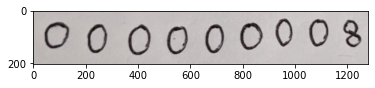

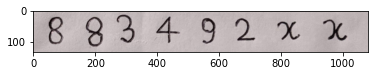

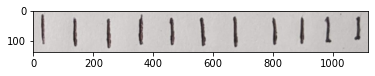

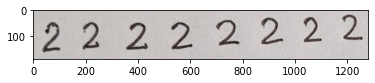

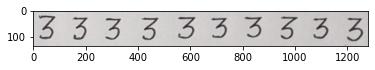

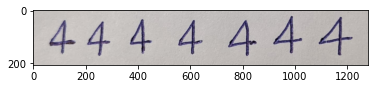

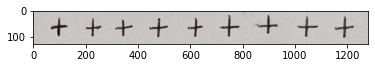

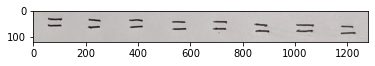

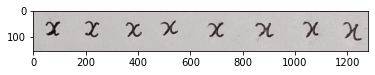

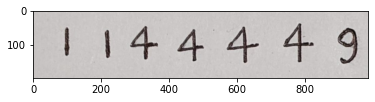

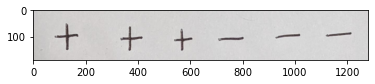

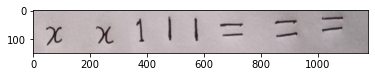

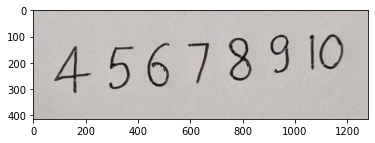

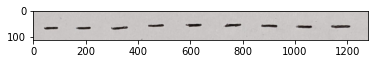

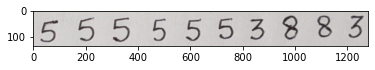

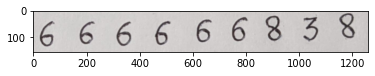

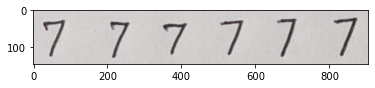

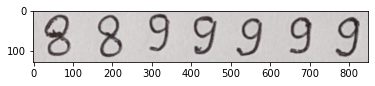

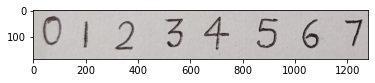

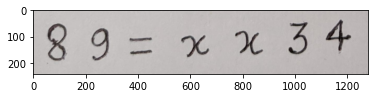

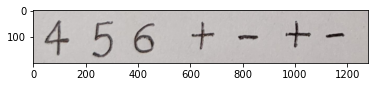

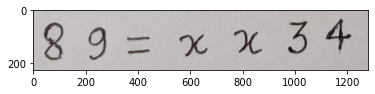

In [5]:
#Show training images
for images in trainImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

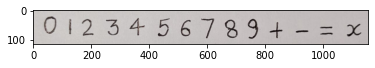

In [6]:
#Show test images
for images in testImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

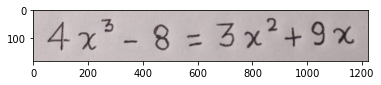

In [7]:
#Show equation image
for images in eqImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

In [8]:
#the cells below preprocess the image and store them with padding and without padding in different lists

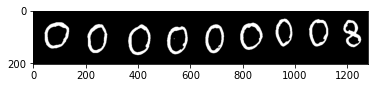

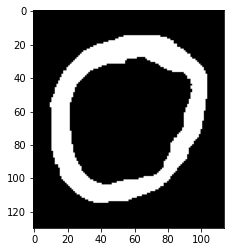

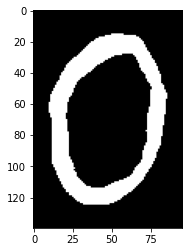

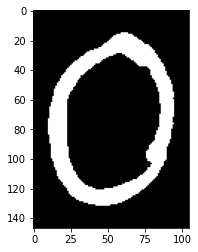

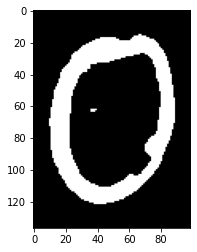

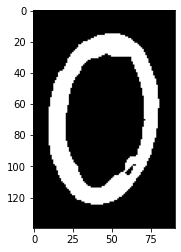

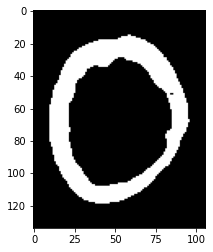

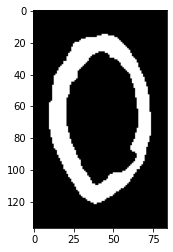

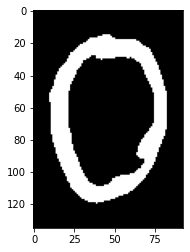

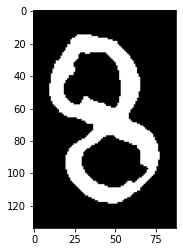

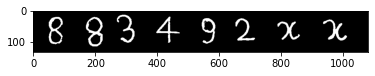

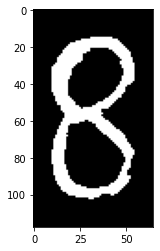

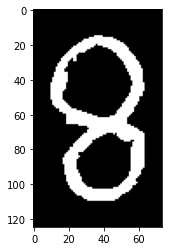

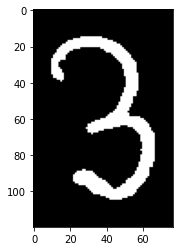

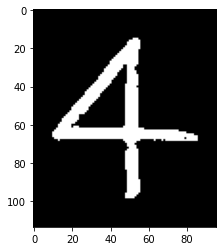

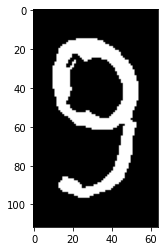

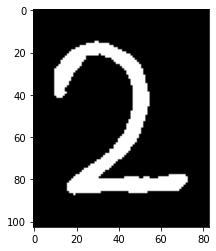

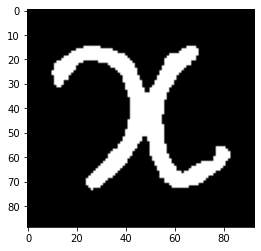

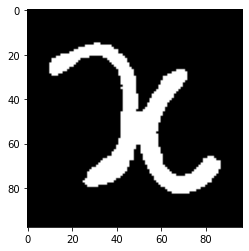

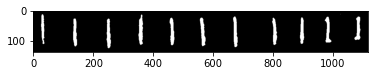

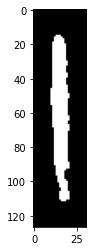

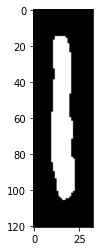

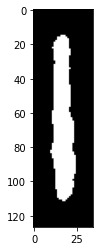

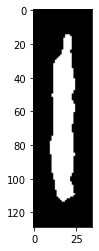

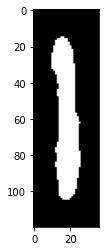

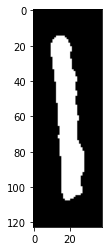

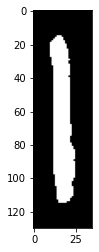

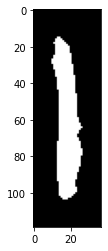

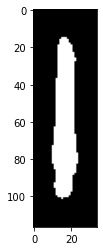

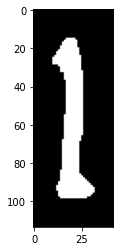

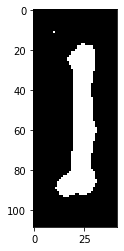

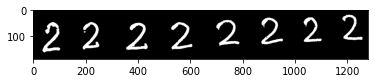

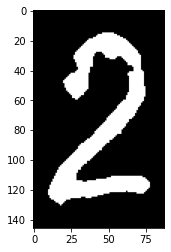

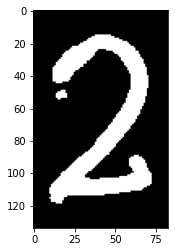

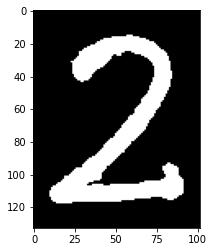

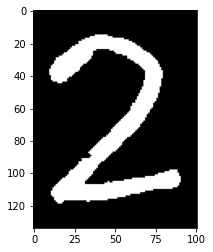

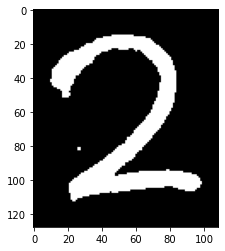

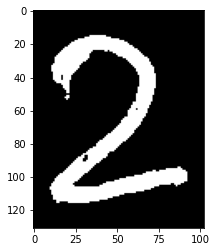

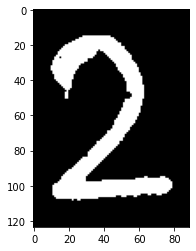

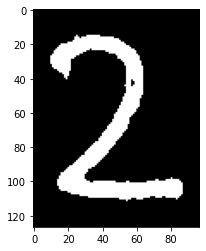

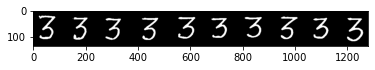

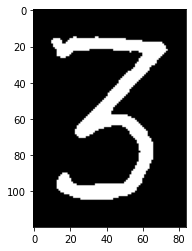

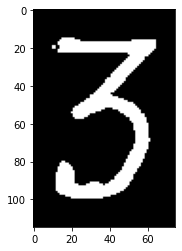

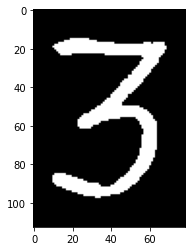

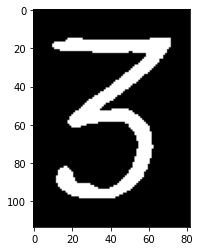

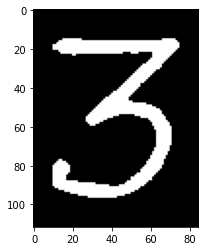

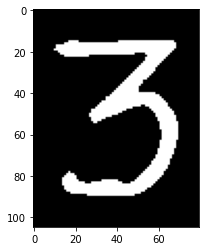

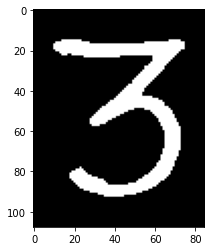

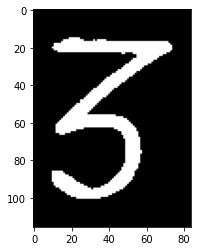

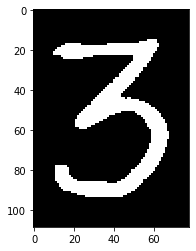

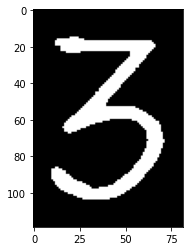

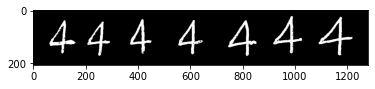

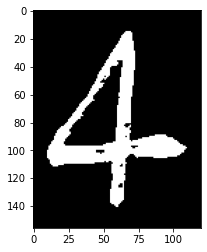

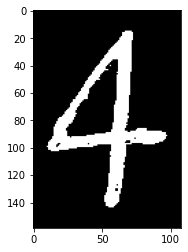

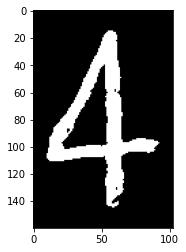

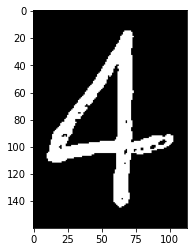

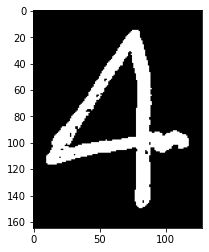

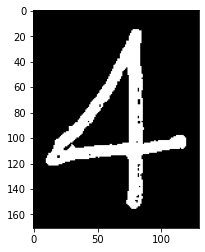

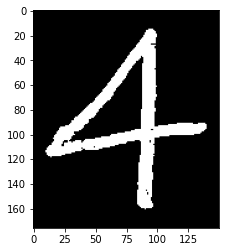

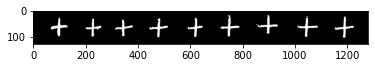

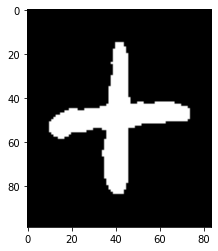

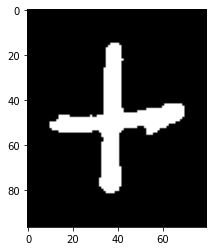

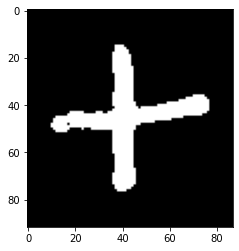

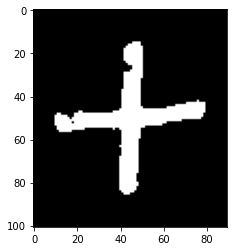

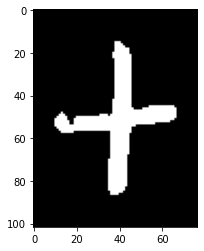

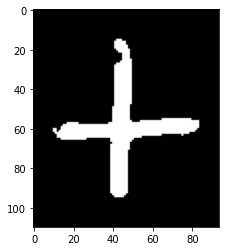

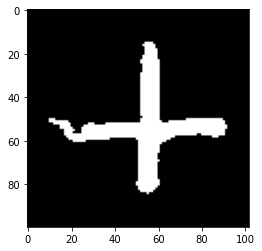

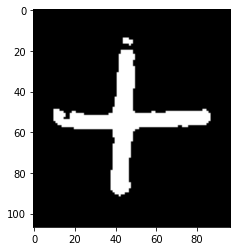

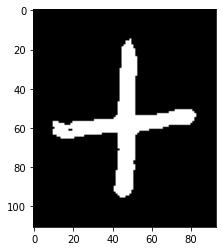

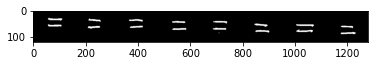

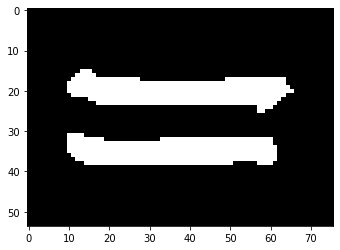

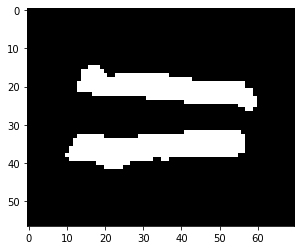

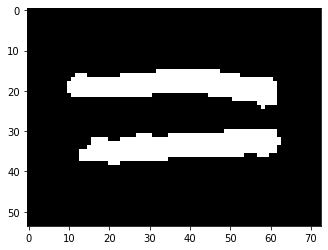

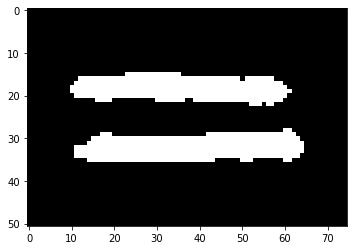

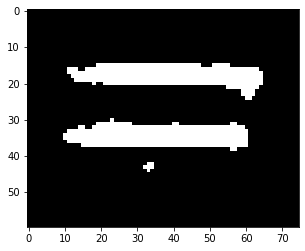

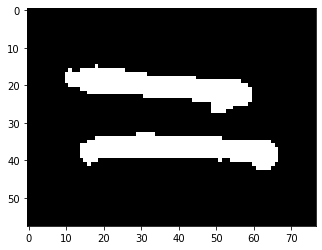

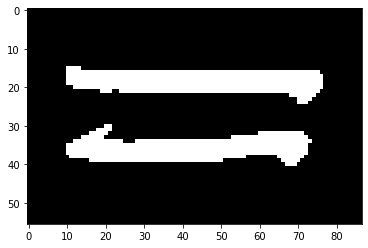

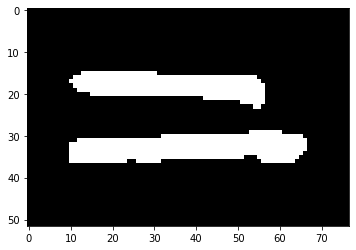

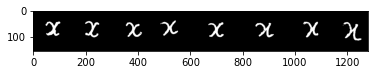

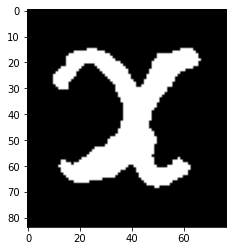

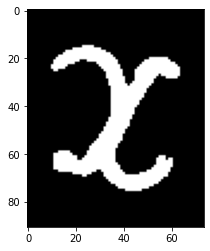

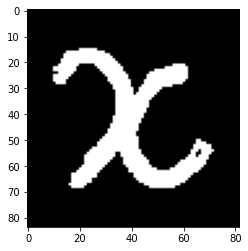

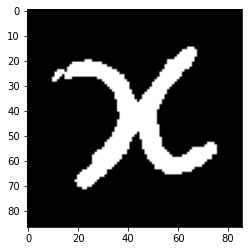

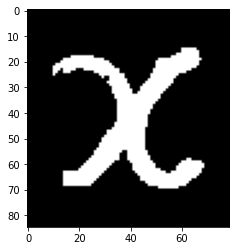

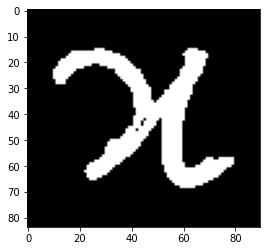

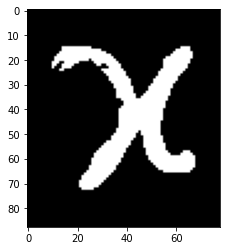

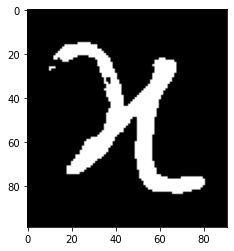

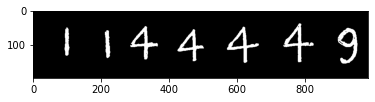

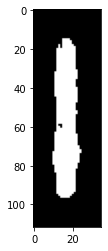

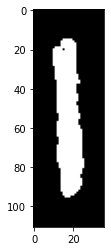

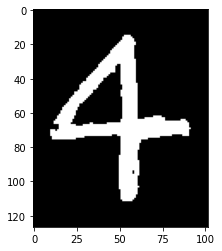

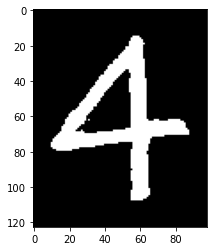

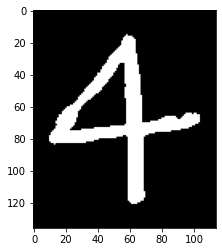

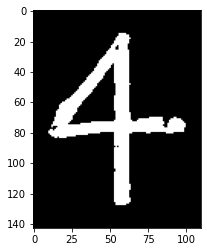

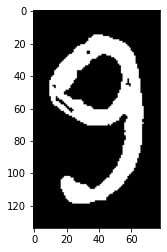

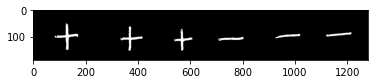

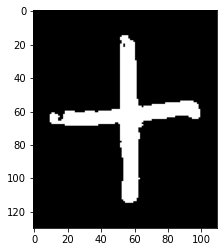

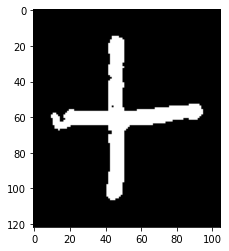

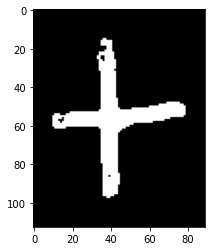

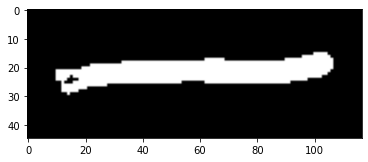

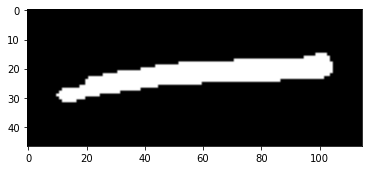

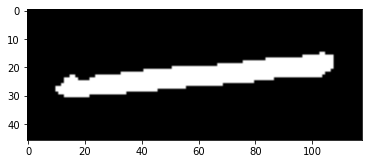

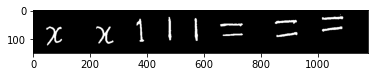

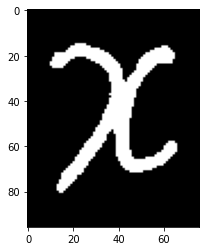

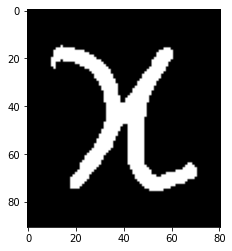

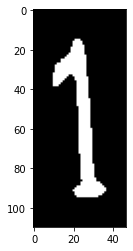

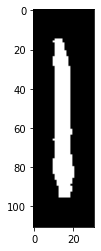

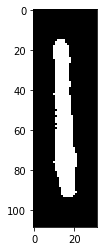

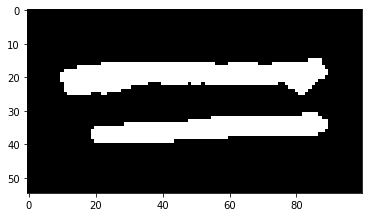

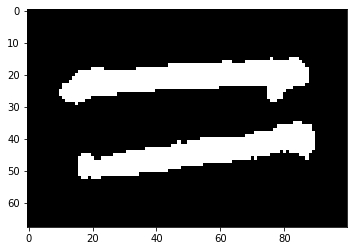

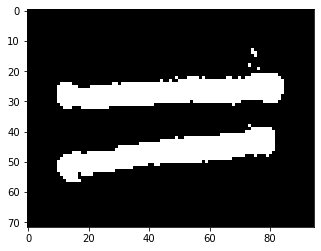

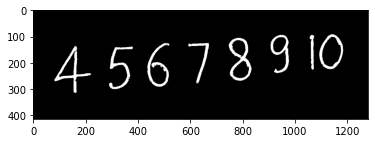

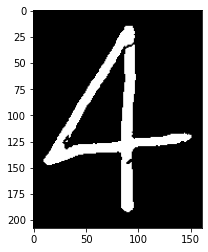

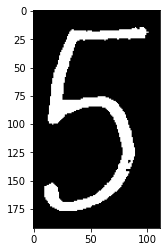

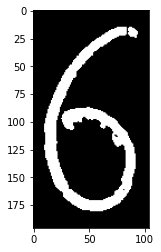

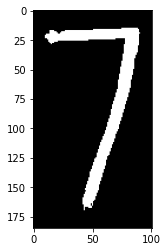

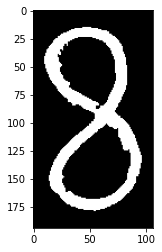

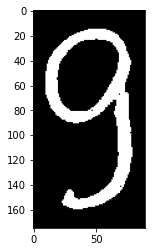

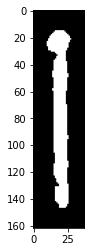

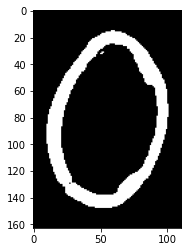

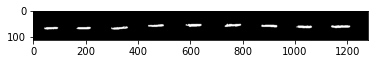

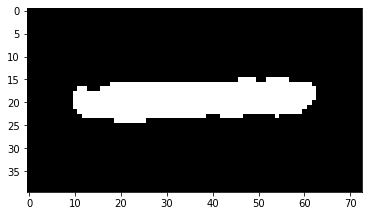

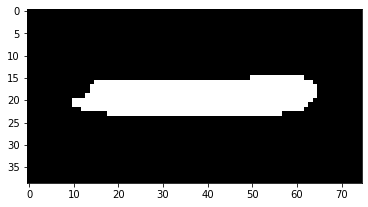

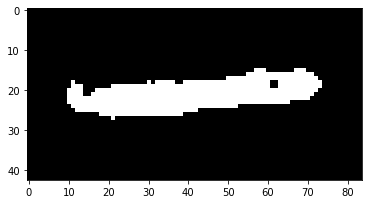

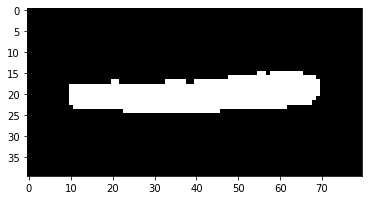

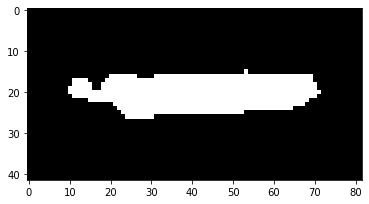

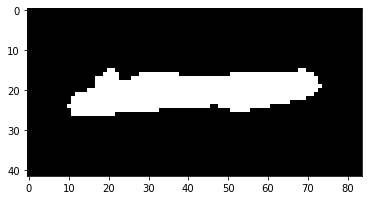

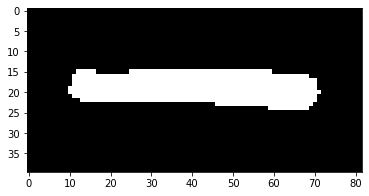

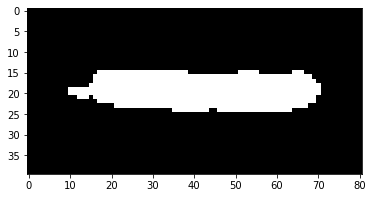

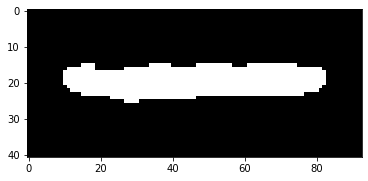

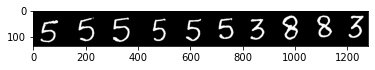

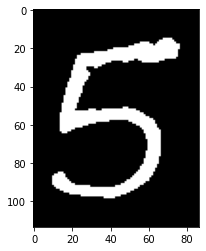

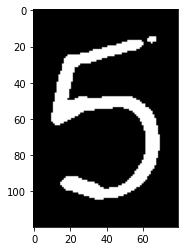

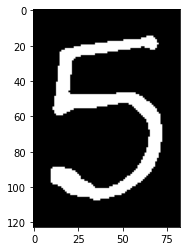

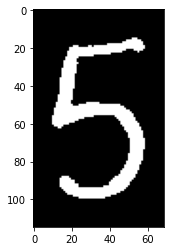

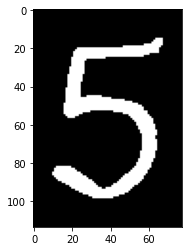

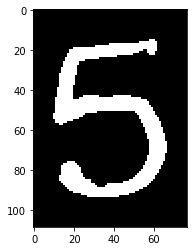

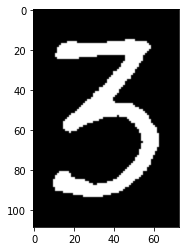

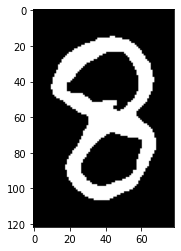

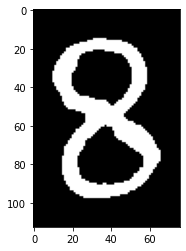

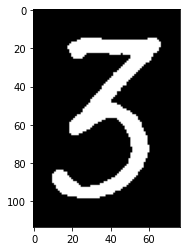

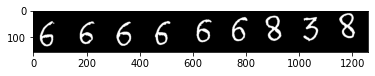

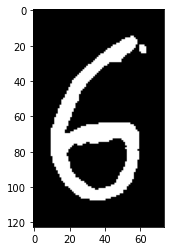

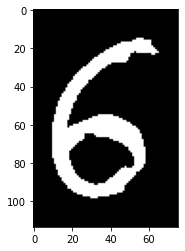

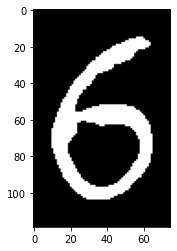

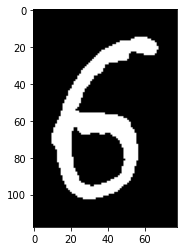

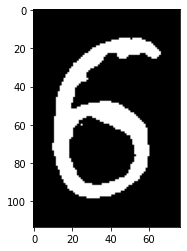

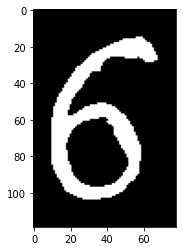

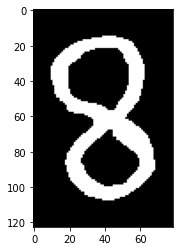

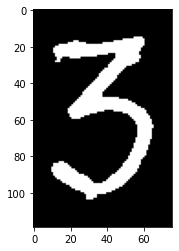

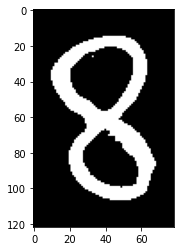

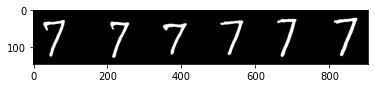

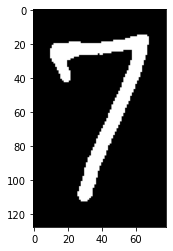

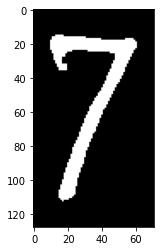

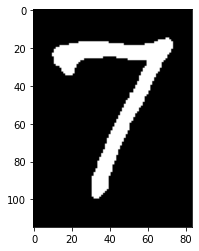

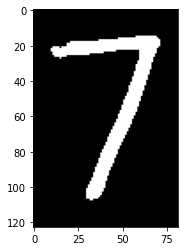

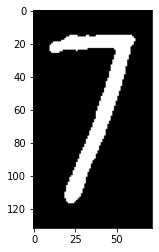

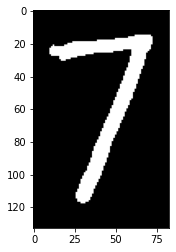

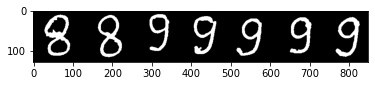

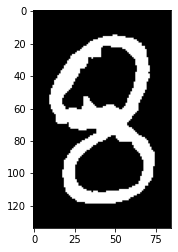

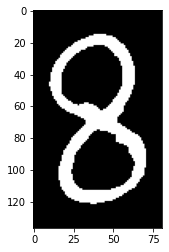

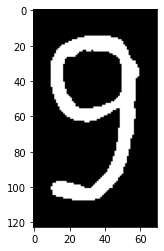

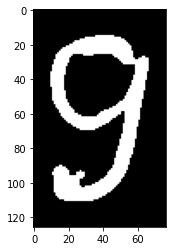

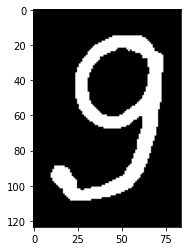

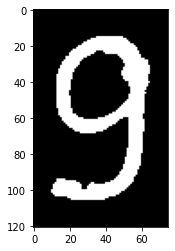

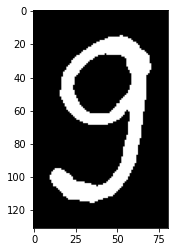

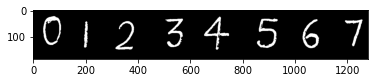

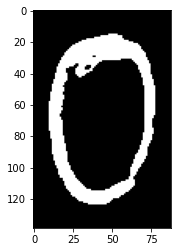

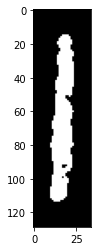

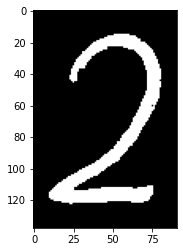

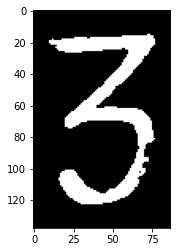

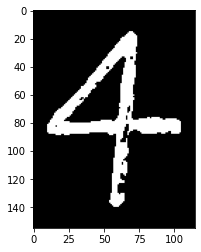

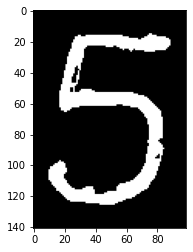

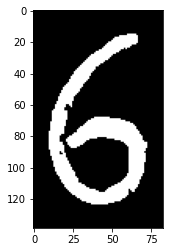

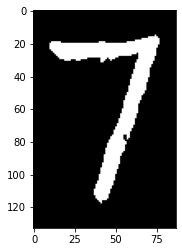

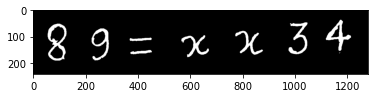

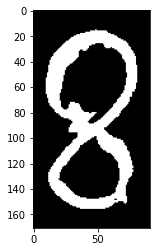

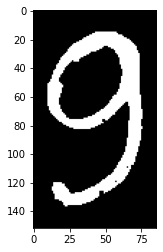

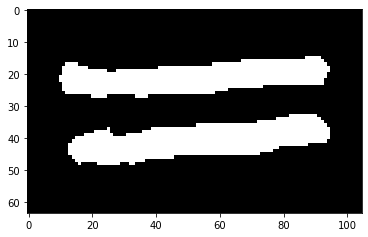

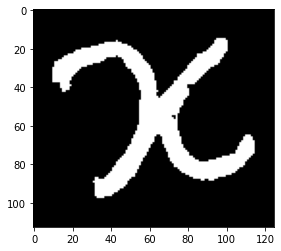

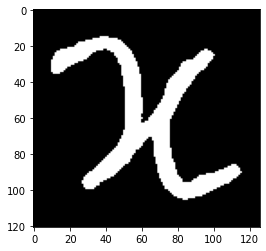

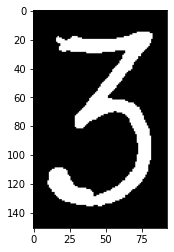

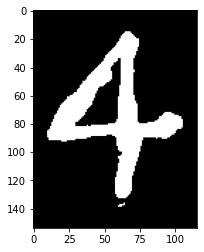

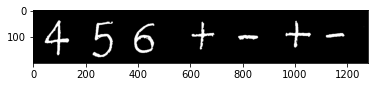

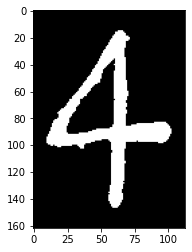

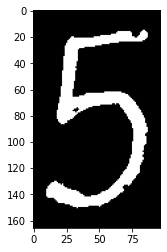

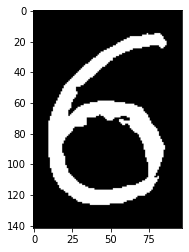

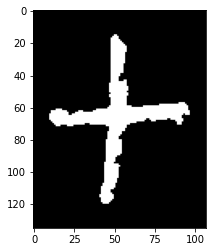

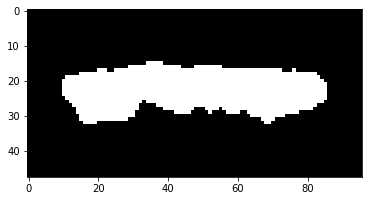

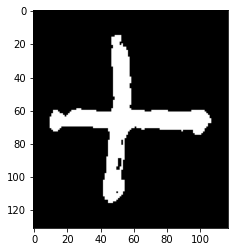

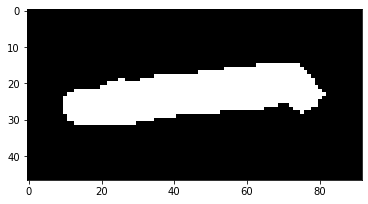

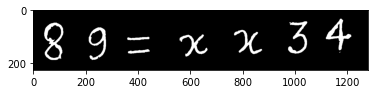

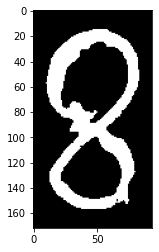

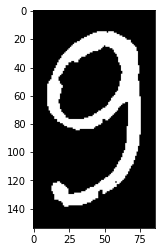

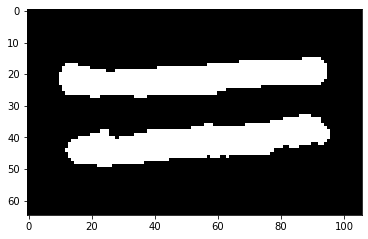

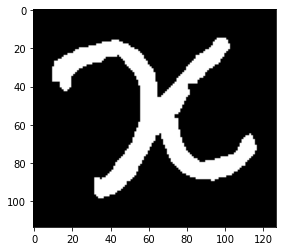

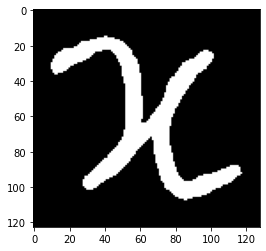

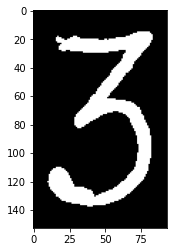

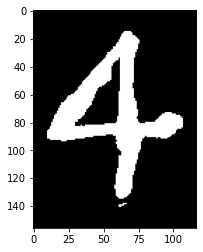

In [9]:
finallist=[]
#another list for no padding in the end
flistNoPad=[]
for images in trainImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    
    # convert to float
    pixel_values = np.float32(pixel_values)
    #K means with k=2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    
    #This for loop separates the segmented digits and operations
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    #this for loop remove border black pixels to center the digits       
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        #to not remove indices from middle(for ''='' case)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        flistNoPad.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        finallist.append(temp0)       

In [10]:
#training label
y_train=[0,0,0,0,0,0,0,0,8,8,8,3,4,9,2,13,13,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,1,1,4,4,4,4,9,10,10,10,11,11,11,13,13,1,1,1,12,12,12,4,5,6,7,8,9,1,0,11,11,11,11,11,11,11,11,11,5,5,5,5,5,5,3,8,8,3,6,6,6,6,6,6,8,3,8,7,7,7,7,7,7,8,8,9,9,9,9,9,0,1,2,3,4,5,6,7,8,9,12,13,13,3,4,4,5,6,10,11,10,11,8,9,12,13,13,3,4]        

In [11]:
len(finallist)

177

In [12]:
len(y_train)

177

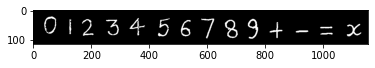

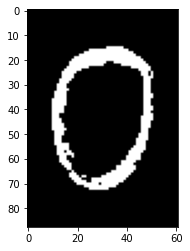

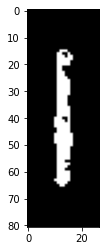

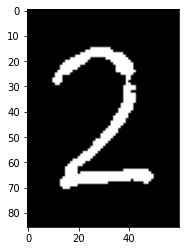

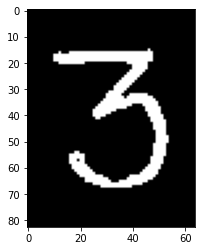

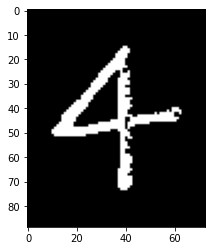

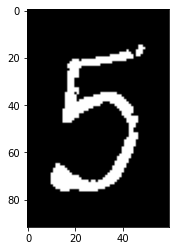

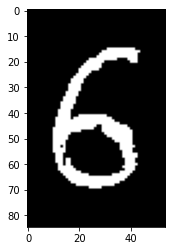

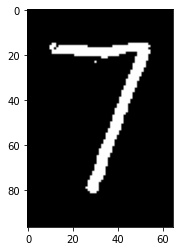

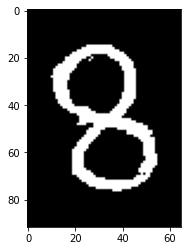

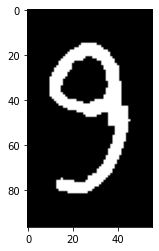

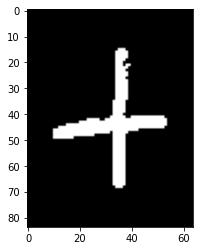

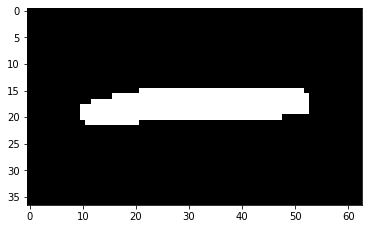

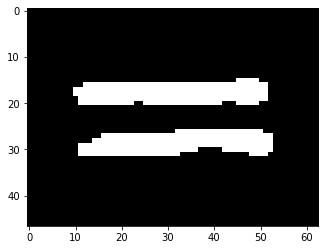

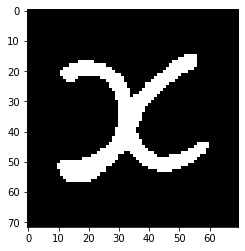

In [13]:
testlist=[]
#another data for no padding in the end
testnopadlist=[]
for images in testImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    #only R from RGB
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    #1269 since i+10 in loop
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        middle=len(var1)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        testnopadlist.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        testlist.append(temp0)
        

In [14]:
#test labels
y_test=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]

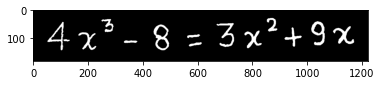

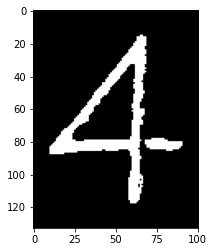

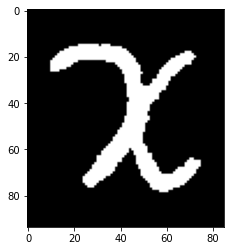

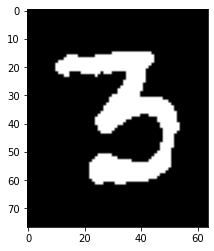

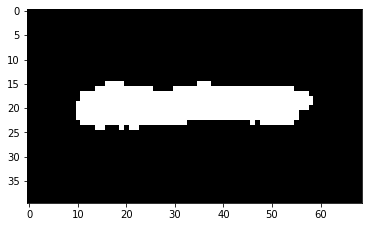

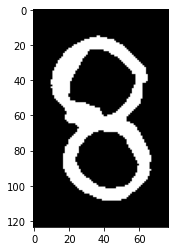

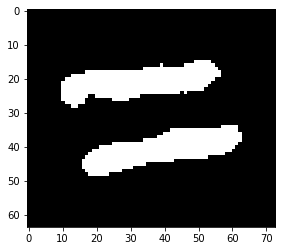

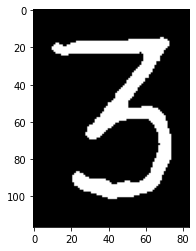

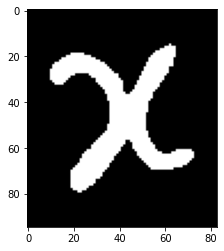

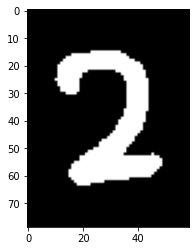

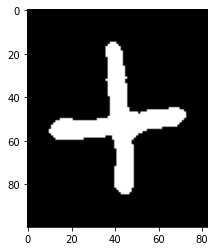

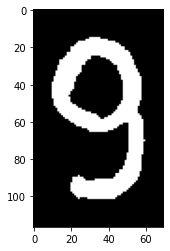

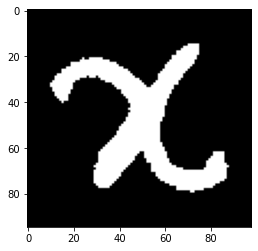

In [15]:
eqlist=[]
#another data for no padding in the end
eqnopadlist=[]
for images in eqImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    #only R from RGB
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    #1269 since i+10 in loop
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        middle=len(var1)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        eqnopadlist.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        eqlist.append(temp0)
        

In [16]:
#equations label 
eq_test=[4,13,3,11,8,12,3,13,2,10,9,13]

In [17]:
leng=len(finallist)
nRows=np.array([k.shape[0] for k in finallist])
nCols=np.array([k.shape[1] for k in finallist])
flistNoPad=flistNoPad
leng2=len(flistNoPad)
nRows2=np.array([k.shape[0] for k in flistNoPad])
nCols2=np.array([k.shape[1] for k in flistNoPad])



In [18]:
#resizing
dsize = (80, 150)
dsizenopad=(60,120)
temp=finallist
temp2=flistNoPad
testtemp=testlist
testtemp2=testnopadlist
eqtemp=eqlist
eqtemp2=eqnopadlist
# resize image
for i in range(leng):
    temp[i] = cv2.resize(finallist[i], dsize)
for i in range(leng2):
    temp2[i] = cv2.resize(flistNoPad[i], dsizenopad)   
for i in range(len(testtemp)):
    testtemp[i] = cv2.resize(testlist[i], dsize)  
for i in range(len(testtemp2)):
    testtemp2[i] = cv2.resize(testnopadlist[i], dsizenopad) 
for i in range(len(eqtemp)):
    eqtemp[i] = cv2.resize(eqlist[i], dsize)  
for i in range(len(eqtemp2)):
    eqtemp2[i] = cv2.resize(eqnopadlist[i], dsizenopad) 

In [19]:
train=temp
test=testtemp
train2=temp2
test2=testtemp2
eq=eqtemp
eq2=eqtemp2

In [20]:
#Flattening the images array
newtrainlist=[k[:,:,0] for k in train]
newtestlist=[k[:,:,0] for k in test]
newtrainlist2=[k[:,:,0] for k in train2]
newtestlist2=[k[:,:,0] for k in test2]
neweqlist=[k[:,:,0] for k in eq]
neweqlist2=[k[:,:,0] for k in eq2]

In [21]:

newtrainlist=[k.flatten() for k in newtrainlist]
newtestlist=[k.flatten() for k in newtestlist]
newtrainlist2=[k.flatten() for k in newtrainlist2]
newtestlist2=[k.flatten() for k in newtestlist2]
neweqlist=[k.flatten() for k in neweqlist]
neweqlist2=[k.flatten() for k in neweqlist2]


In [22]:
x_train = np.vstack(newtrainlist)
print((x_train.shape))
x_test=np.vstack(newtestlist)
print((x_test.shape))

x_train2 = np.vstack(newtrainlist2)
x_test2=np.vstack(newtestlist2)
print((x_train2.shape))
print((x_test2.shape))
x_eq=np.vstack(neweqlist)
x_eq2=np.vstack(neweqlist2)

(177, 12000)
(14, 12000)
(177, 7200)
(14, 7200)


In [23]:
#Over sampling (did not help much with acuracy)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

Using TensorFlow backend.


In [24]:
#Dividing the pixel values by 255 to get only 0 and 1 values in the input arrays 
def fn(x):
    if(x==0):
        return 0
    else :
        return 1
fn=np.vectorize(fn)    
x_train3=fn(x_train)
x_train4=fn(x_train2)
x_test3=fn(x_test)
x_test4=fn(x_test2)
x_eq3=fn(x_eq)
x_eq4=fn(x_eq2)

In [25]:
#equation image correct labels
print(eq_test)

[4, 13, 3, 11, 8, 12, 3, 13, 2, 10, 9, 13]


In [26]:
# IN ALL THE MODELS I AM USING UNPADDED IMAGES SINCE PADDED IMAGES GAVE LOWER ACURACY 
#TO TEST USING THE PADDED IMAGES USE x_train and x_test instead of x_train2 and x_test2

In [27]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'multinomial',random_state=1)
lr.fit(x_train2, y_train)

LogisticRegression(multi_class='multinomial', random_state=1)

In [28]:
print(lr.score(x_test2,y_test))
print(lr.score(x_eq2,eq_test))


1.0
0.9166666666666666


In [29]:
#SVM model
from sklearn import svm
svmf = svm.SVC(decision_function_shape='ovo')
svmf.fit(x_train2, y_train)

SVC(decision_function_shape='ovo')

In [30]:
print(svmf.score(x_test2,y_test))
print(svmf.score(x_eq2,eq_test))

0.9285714285714286
1.0


In [31]:
#Decision tree model
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=10)
dt= dt.fit(x_train2, y_train)

In [32]:
print(dt.score(x_test2,y_test))
print(dt.score(x_eq2,eq_test))

0.5714285714285714
0.6666666666666666


In [33]:
#best model KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
print(neigh.score(x_test2,y_test))
print(neigh.score(x_eq2,eq_test))
#100% Accuracy on both test image and equation image

1.0
1.0


In [35]:
#Mapping labels to their digits and operations
dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'+',11:'-',12:'=',13:'x'}

In [36]:
#print equation 
def printEq(x):
    flag=0
    for i in range(len(x)):
        if flag==1:
            flag=0
            continue
        if i!=len(x)-1 and dic[x[i]]=='x'and x[i+1]!=10 and x[i+1]!=11 and x[i+1]!=12:
            print('x^'+str(dic[x[i+1]]), end=" ")
            flag=1
        else :
            print(dic[x[i]], end=" ")

In [37]:
# Find degree of polynomial
def highdegree(x):
    Max=1
    for i in range(len(x)):
        if i!=len(x)-1 and x[i]==13 and x[i+1]!=10 and x[i+1]!=11 and x[i+1]!=12:
            Max=max(Max,x[i+1])
    return Max        


In [38]:
#Solve the equation
def solution(x):
    printEq(x)
    print("")
    degree=highdegree(x)
    eq=np.ones(degree+1)
    #equality index
    ind=0
    for i in x:
        if i==12:
            break
        ind=ind+1   
    x=x[0:ind]+x[ind+1:len(x)]
    def ret(i):
        if i>ind:
            if x[i-1]==10:
                return -1*x[i]
        if i==ind:
            return -1*x[i]
        if i<ind and i>0:
            if x[i-1]==11:
                return -1*x[i]
        else :
            return x[i]
    for k in range(degree+1):
        #find constant term
        if k==0 :
            for i in range(len(x)):
                #x not infront , x not in back
                if i==0:
                    if x[i+1]!=13 and x[i]<10:
                        eq[degree-k]=ret(i)
                        break
                if i==len(x)-1:
                    eq[degree-k]=ret(i)
                    break
                if x[i+1]!=13 and x[i-1]!=13 and x[i]<10:
                    eq[degree-k]=ret(i)
                    break
        if k==1:
            for i in range(len(x)):
                if i==len(x)-2:
                    eq[degree-k]=ret(i) 
                if(i<len(x)-2):    
                    if x[i+1]==13 and x[i+2]>9 and x[i]<9:
                        eq[degree-k]=ret(i) 
                        break
                else:
                    eq[degree-k]=ret(i-1)        
        if k>1:
            for i in range(2,len(x)):
                if x[i]==k and x[i-1]==13:
                    eq[degree-k]=ret(i-2)
                    break
    #Print and return ans
    print(np.roots(eq))
    return np.roots(eq)

In [39]:
#Final Output
solution(list(svmf.predict(x_eq2)))

4 x^3 - 8 = 3 x^2 + 9 x 
[ 2.19238137+0.j         -0.72119068+0.62620607j -0.72119068-0.62620607j]


array([ 2.19238137+0.j        , -0.72119068+0.62620607j,
       -0.72119068-0.62620607j])

In [40]:
#To plot decision boundary only two components are used 
'''from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train2=pca.fit_transform(x_train2)'''


'from sklearn.decomposition import PCA\npca = PCA(n_components=2)\nx_train2=pca.fit_transform(x_train2)'

In [41]:
'''from itertools import product
x_min, x_max = x_train2[:, 0].min() - 1, x_train2[:, 0].max() + 1
y_min, y_max = x_train2[:, 1].min() - 1, x_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [lr, svmf, dt, neigh],
                        ['Multinomial Logistic Regression','SVM','Decision Tree (depth=10)',  'KNN (k=1)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train2[:, 0], x_train2[:, 1], c=y_test,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()'''
#CANNOT PLOT DECISION BOUNDARIES SINCE NOT ENOUGH MEMEORY AVAILABLE 

"from itertools import product\nx_min, x_max = x_train2[:, 0].min() - 1, x_train2[:, 0].max() + 1\ny_min, y_max = x_train2[:, 1].min() - 1, x_train2[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\n                     np.arange(y_min, y_max, 0.1))\n\nf, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))\n\nfor idx, clf, tt in zip(product([0, 1], [0, 1]),\n                        [lr, svmf, dt, neigh],\n                        ['Multinomial Logistic Regression','SVM','Decision Tree (depth=10)',  'KNN (k=1)']):\n\n    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n\n    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)\n    axarr[idx[0], idx[1]].scatter(x_train2[:, 0], x_train2[:, 1], c=y_test,\n                                  s=20, edgecolor='k')\n    axarr[idx[0], idx[1]].set_title(tt)\n\nplt.show()"